# GreEn-ER Dataset

The data set consists of electrical consumption data for the GreEn-ER building, as well as meteorological data since September 2016. 

In [ ]:
import scipy.io as sio
import numpy as np
greener_dataset= sio.loadmat('greener_conso_meteo_2016_2018.mat')
X= greener_dataset['data']
X.shape

## Variables (available measurements)

In [ ]:
vbls= greener_dataset['variable_names']
variable_names = [vbls[0][i][0] for i in range(vbls.shape[1])]
print(variable_names)

In [ ]:
vunits= greener_dataset['variable_units']
variable_units = [vunits[0][i][0] for i in range(vunits.shape[1])]
print(variable_units)

### Biplot function to display both scores and loadings 

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt


def biplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n=coeff.shape[1]
    xvector = coeff[0] # see 'prcomp(my_data)$rotation' in R
    yvector = coeff[1]
    
    scalex = 1.0/(xs.max()- xs.min())
    scaley = 1.0/(ys.max()- ys.min())
    plt.scatter(xs*scalex,ys*scaley)
    for i in range(n):
        plt.arrow(0, 0, xvector[i], yvector[i],color='r',alpha=0.5,width=0.0005, head_width=0.0025)
        if labels is None:
            plt.text(xvector[i]* 1.15, yvector[i] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(xvector[i]* 1.15, yvector[i] * 1.15, labels[i], color='g', ha='center', va='center')


['var1', 'var2', 'var3', 'var4', 'var5', 'var6', 'var7', 'var8', 'var9', 'var10']


<IPython.core.display.Javascript object>


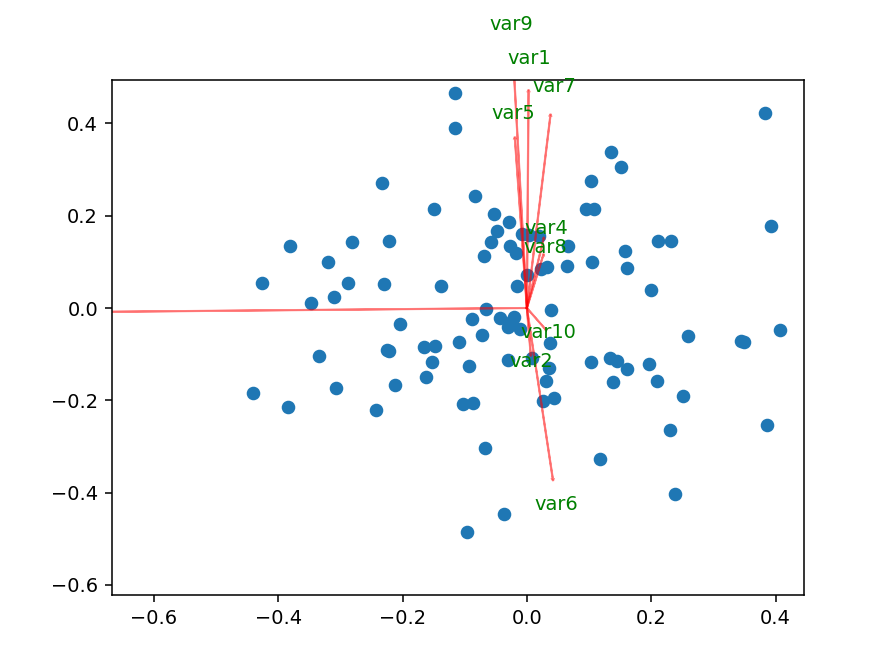

In [25]:
# Example of use on synthetic data

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#from sklearn.impute import SimpleImputer
from sklearn.preprocessing import Imputer
import numpy as np

# draw some data
X=np.random.randn(100,10)

# variable names
vbls= []
for i in range(10):
    vbls.append( 'var' + str(i+1) )
print(vbls)

# add scale effect
X[:,2]= 5 * X[:,2] ;
# add missing data
X[20:25,7]= np.nan


# impute missing data
#imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = Imputer(missing_values=np.nan, strategy='mean')
X_imp= imp.fit_transform(X)

# normalize
scaler = StandardScaler()
X_scale= scaler.fit_transform(X_imp)

# make PCA
pca = PCA()
pca.fit(X_scale)
X_transform=pca.transform(X_scale)

# visualize
biplot(X_transform[:,0:2],pca.components_[0:2,:], labels=vbls)


 # TODO
 
 1. Restrict first to electrical consumption variables
   - transform them in principal component basis
   - visualize scores and loadings
   - see the scale effects 
   - perform dimension reduction
 2. Same on the full dataset: electrical consumption + meteorological data
   - take care of normalization, missing data, ...

ModuleNotFoundError: No module named 'sklearn.impute'